In [2]:
#importing visualisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline , make_pipeline

#importing metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

#importing preprocessing
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer

#importing regression models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor

ModuleNotFoundError: No module named 'category_encoders'

In [3]:
startupsdf = pd.read_csv("50_Startups.csv")

In [4]:
startupsdf.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
startupsdf.shape

(50, 5)

In [ ]:
startupsdf.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
startupsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


C:\Users\joyce\AppData\Local\Temp\ipykernel_2472\459756424.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = startupsdf.corr()


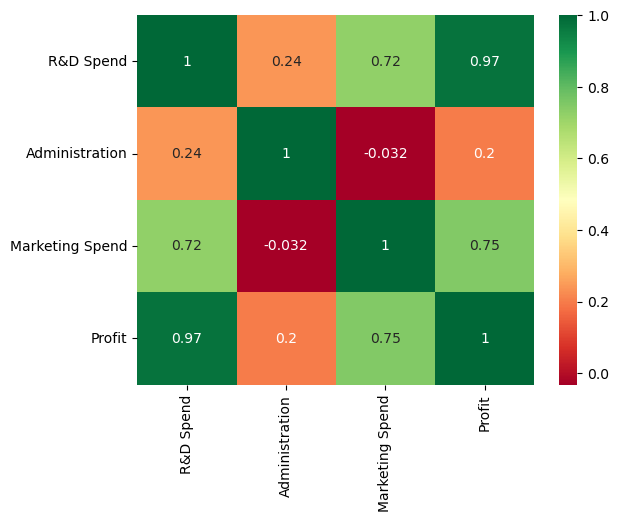

In [5]:
corr = startupsdf.corr()
sns.heatmap(corr, annot=True, cmap = "RdYlGn")
plt.show()

<Axes: >

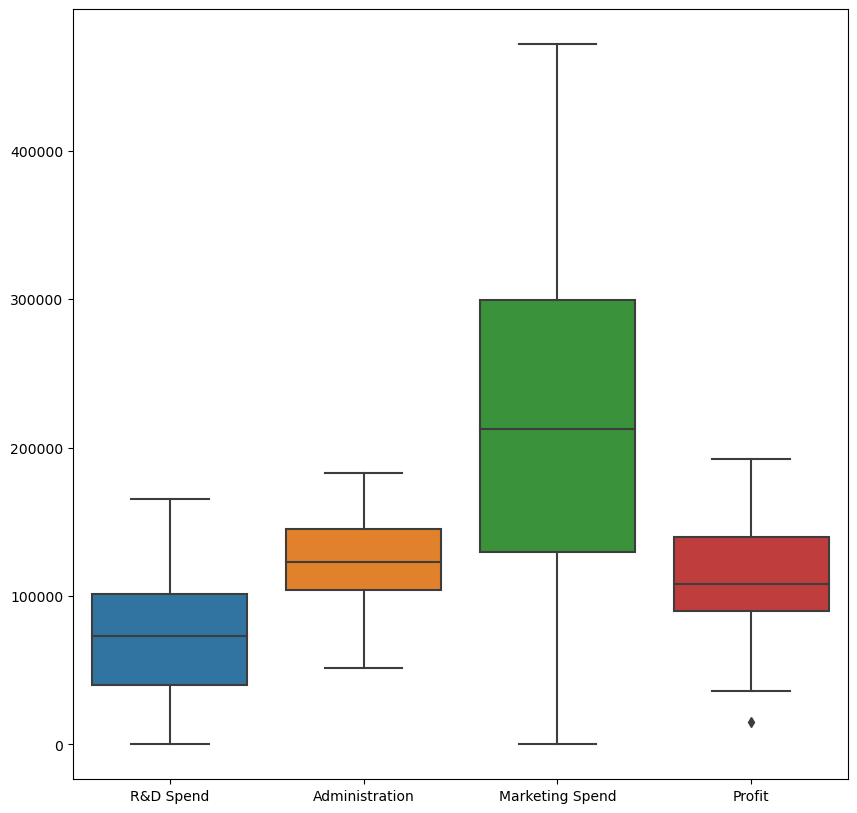

In [6]:
plt.figure(figsize=(10,10))
sns.boxplot(data=startupsdf)

In [7]:
#removing outliers
iqr = startupsdf['Profit'].quantile(0.75) - startupsdf['Profit'].quantile(0.25)
print(iqr)

49627.07499999998


In [8]:
# calculate lower and upper bounds
lower_bound = startupsdf['Profit'].quantile(0.25) - (1.5 * iqr)
upper_bound = startupsdf['Profit'].quantile(0.75) + (1.5 * iqr)

# loop
profit=startupsdf['Profit']
outliers=[]
for i in profit:
    if i < lower_bound or i > upper_bound:
        outliers.append(i)
print(outliers)
 

[14681.4]


In [9]:
startupsdf['Profit']= startupsdf['Profit'].replace(outliers, startupsdf['Profit'].mean())

<Axes: >

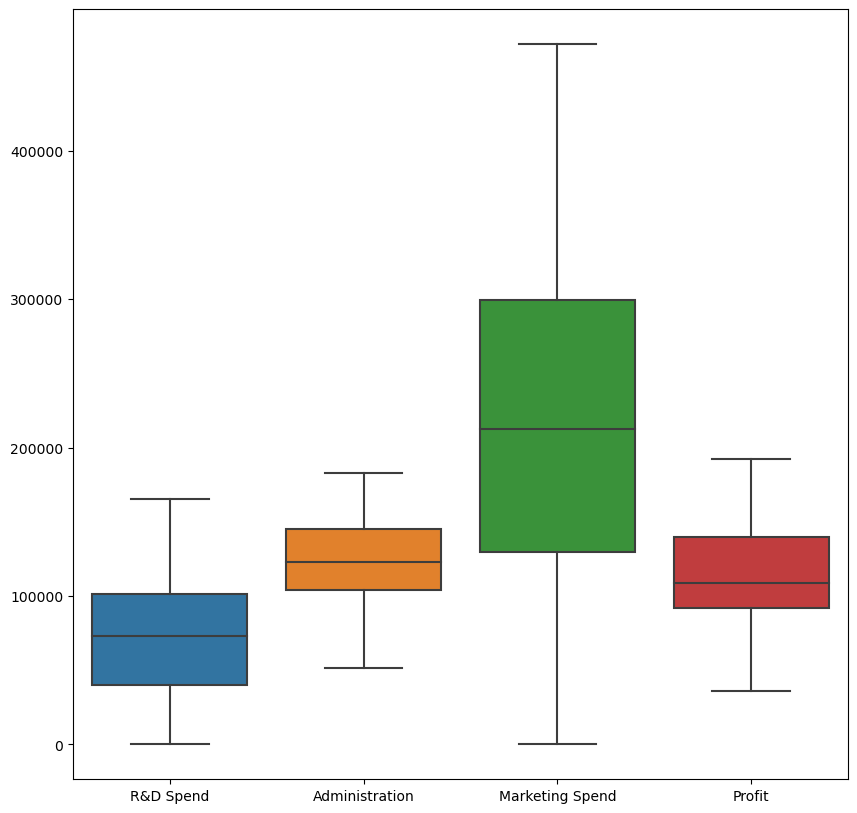

In [10]:
plt.figure(figsize=(10,10))
sns.boxplot(data=startupsdf)